# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

Imports


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Consigna 1

##### Ecuacion
$$p = (I-A)^{-1}d = Ld$$

##### a. Cuando $ (I-A) $ es inversible la matriz de Leontief se puede calcular. En este caso la solucion al sistema 2 existe y es unica.

##### b. Cuando $ (I-A) $ es inversible pero el vector d = 0 tenemos una economia cerrada en donde para toda matriz de Leontief el valor de p va a ser 0.

##### c. Cuando $ (I-A) $ no es inversible significa que el sistema no tiene solucion unica o no tiene solucion.

##### d. Cuando $ (I-A) $ no es inversible y d = 0 el sistema se puede reducir a $ (I-A)p = 0 $ el cual posee soluciones no triviales por lo tanto hay soluciones infinitas que satisfacen la ecuacion.


---

### Consigna 2

In [2]:
from funciones import inversaLU, calcularPLU, solve_LU, calcularLU, inversaPLU, calcular_coeficientes_tecnicos

---

### Consigna 3

In [11]:
A = np.array([[0.3, 0.0, 0.1],[0.05, 1, 0.2],[0.1, 0.15, 0.1]])
d = np.array([100,100,300])

rows,cols = A.shape
id = np.eye(rows, cols)
i_A = id - A
L, U, P = calcularPLU(i_A)
leontief = inversaPLU(L,U,P)

p = leontief @ d
print(f"Produccion total por producto:\nSector 1: {p[0]}\nSector 2: {p[1]}\nSector 3: {p[2]}")
print("Vector P:")
print(f"p = ({p[0]},{p[1]},{p[2]})")

Produccion total por producto:
Sector 1: 64.03940886699509
Sector 2: -5305.418719211823
Sector 3: -551.7241379310345
Produccion total de cada producto:
p = (64.03940886699509,-5305.418719211823,-551.7241379310345)


a. Como el producto 2 necesita una unidad del producto 2 para producir otra unidad del producto 2, no puede dar abasto a demanda interna y externa al mismo tiempo, por lo que su producción total decae, lo que refleja el valor negativo en el vector p. Esto afecta a cualquiera de los productos que dependan de este, ya que si un insumo escasea, la producción de los productos que dependan de este también se verá afectada. Por lo tanto, la producción del producto 3 también es negativa, pero el producto 1, al no necesitar del producto 2, no ve afectada negativamente su producción total.

b. El valor 1 en la diagonal correspondiente a lo que necesita el producto 2 del producto 2 es lo que genera una produccion negativa y por esa razon esta matriz genera los resultados obtenidos

---

### Consigna 4

In [4]:
delta_d = np.array([0,0,1])
d_prima = d + delta_d
p_prima = leontief @ d_prima
delta_p = p_prima - p 

print("Diferencia en la produccion de cada producto al aumentar la demanda por un Δd dado:")
print(f"Δp = ({delta_p[0]},{delta_p[1]},{delta_p[2]})")

Diferencia en la produccion de cada producto al aumentar la demanda por un Δd dado:
Δp = (0.0,-6.66666666666697,0.0)


Se puede observar que al aumentar la demanda externa del producto 3, por lo explicado en el punto 3.a, se necesitara aun mas insumos del producto, lo que se traduce en la diferencia de produccion unicamente en el producto 2, que al no poder satisfacerla, pasa a ser negativa.

---

### Consigna 5

In [5]:
Z = np.array([[350, 0, 0],[50, 250, 150],[200, 150, 550]]) #Matriz Z: Flujos de insumos en unidades monetarias
rows, cols = Z.shape
P = np.array([[1000,0,0],[0,500,0],[0,0,1000]]) #Matriz P: Produccion total

A = calcular_coeficientes_tecnicos(Z,P) #Matriz A: Coeficientes tecnicos
i_A = np.eye(rows, cols) - A
leontief = inversaPLU(*calcularPLU(i_A))

print("Coeficientes tecnicos de la matriz A:")
print(A)
print("\nMatriz de Leontief asociada a la matriz A:")
print(leontief) 

Coeficientes tecnicos de la matriz A:
[[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]

Matriz de Leontief asociada a la matriz A:
[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


---

### Consigna 6

Lo que queremos lograr es deducir cómo varía la producción $p^r$ en función de una variación en la demanda, fijando el que no hay cambios en la demanda de la región $s$ (es decir, $\Delta d^s = 0$). Vamos a descomponer el problema para deducir la fórmula $\Delta p^r = (I - A^{rr} - A^{rs}(I - A^{ss})^{-1}A^{sr})^{-1}\Delta d^r$.

#### Empezamos a partir de la ecuación matricial de la fórmula 4

$$
\left(
\begin{pmatrix}
I_{n\times n} & 0_{n\times m} \\
0_{m\times n} & I_{m\times m}
\end{pmatrix}
 -
\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix}
\right)
\begin{pmatrix}
p^r \\
p^s
\end{pmatrix} =
\begin{pmatrix}
d^r \\
d^s
\end{pmatrix}
$$

Descomponemos esta expresión en dos ecuaciones que corresponden a cada bloque:

$$(I_{n\times n} \quad 0_{n\times m}) - (A^{rr} \quad A^{rs})\begin{pmatrix}p^r \\ p^s\end{pmatrix} = d^r$$

$$(0_{m\times n} \quad I_{m\times m}) - (A^{sr} \quad A^{ss})\begin{pmatrix}p^r \\ p^s\end{pmatrix} = d^s$$

Estas ecuaciones se pueden reescribir como:

1. Para la región $r$:
   $$(I - A^{rr})p^r - A^{rs}p^s = d^r$$

2. Para la región $s$:
   $$-A^{sr}p^r + (I - A^{ss})p^s = d^s$$



####  Resolvemos la ecuación para $p^s$ y sustituimos $p^s$ en la ecuación de la región $r$

Como sabemos que $\Delta d^s = 0$  podemos resolver para $p^s$ en la segunda ecuación:

$$(I - A^{ss})p^s = A^{sr}p^r$$

Despejando $p^s$:

$$p^s = (I - A^{ss})^{-1}A^{sr}p^r$$

Ahora reemplazamos esta expresión de $p^s$ en la primera ecuación para la región $r$:

$$(I - A^{rr})p^r - A^{rs}(I - A^{ss})^{-1}A^{sr}p^r = d^r$$

Factorizamos $p^r$ en el lado izquierdo de la ecuación:

$$(I - A^{rr} - A^{rs}(I - A^{ss})^{-1}A^{sr})p^r = d^r$$

#### Variación de la demanda

Si ahora consideramos una variación en la demanda $\Delta d^r$, la ecuación queda:

$$(I - A^{rr} - A^{rs}(I - A^{ss})^{-1}A^{sr})\Delta p^r = \Delta d^r$$

Despejando $\Delta p^r$, obtenemos la fórmula deseada:

$$\Delta p^r = (I - A^{rr} - A^{rs}(I - A^{ss})^{-1}A^{sr})^{-1}\Delta d^r$$


---

### Consigna 7

Cargamos el dataset

In [3]:
path = "matrizlatina2011_compressed_0.xlsx"
dataset = pd.read_excel(path, sheet_name=1)

b) Matrices de Insumo Producto de cada pais

In [5]:

COL = dataset[dataset["Country_iso3"] =="COL"]
BOL = dataset[dataset["Country_iso3"] =="BOL"]
sectores = dataset["Sector"].unique()[:40] #Nombres de los sectores

In [6]:
#Separamos los dataframes de cada pais 

bol_cols = [f"BOLs{i}" for i in range(1,41)] #Columnas de Bolivia
col_cols = [f"COLs{i}" for i in range(1,41)] #Columnas de Colombia

col_p = COL["Output"] #Produccion total de Colombia
bol_p = BOL["Output"] #Produccion total de Bolivia

Dimensiones de la matriz P de Bolivia: (40, 40)
Dimensiones de la matriz P de Colombia: (40, 40)


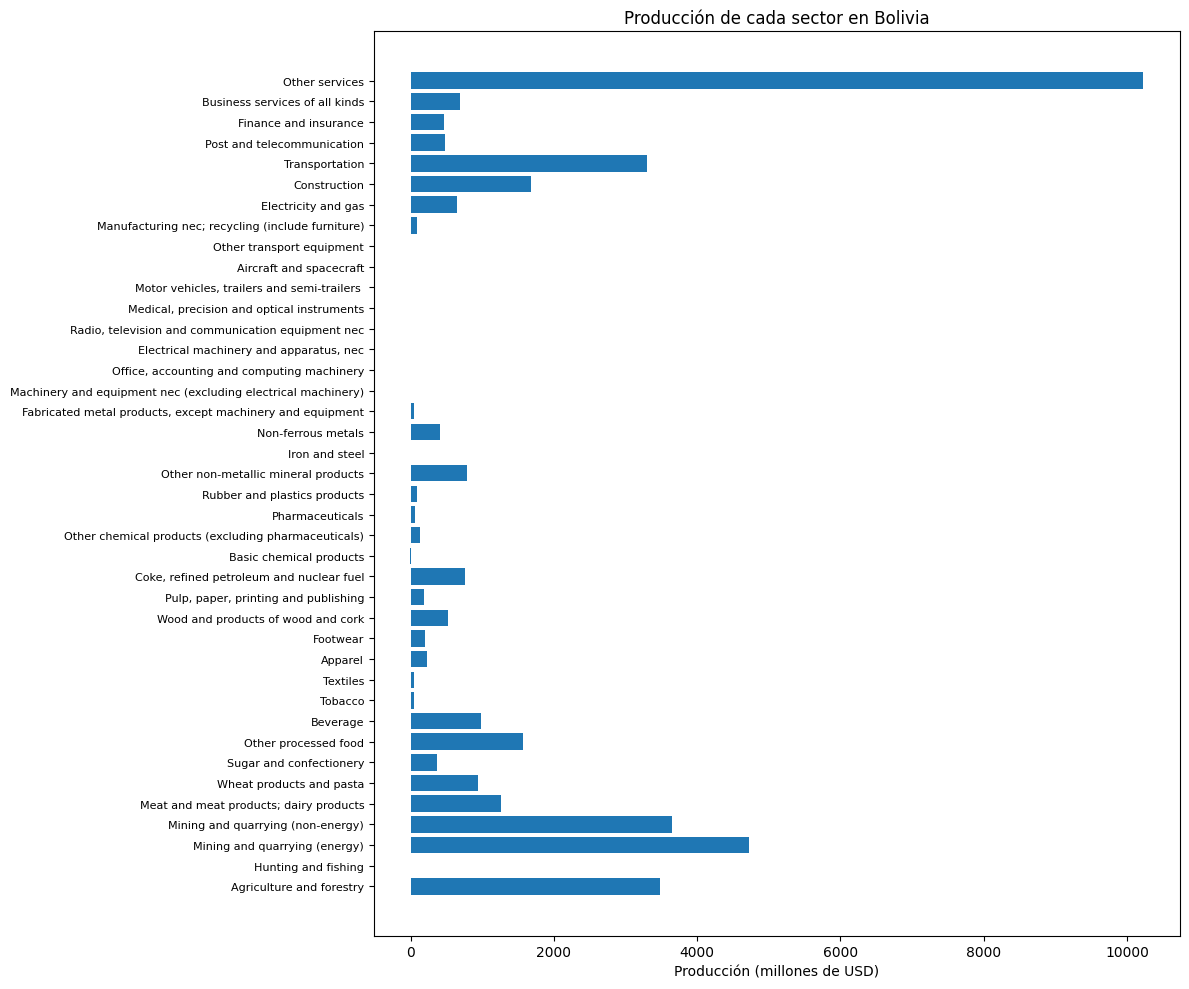

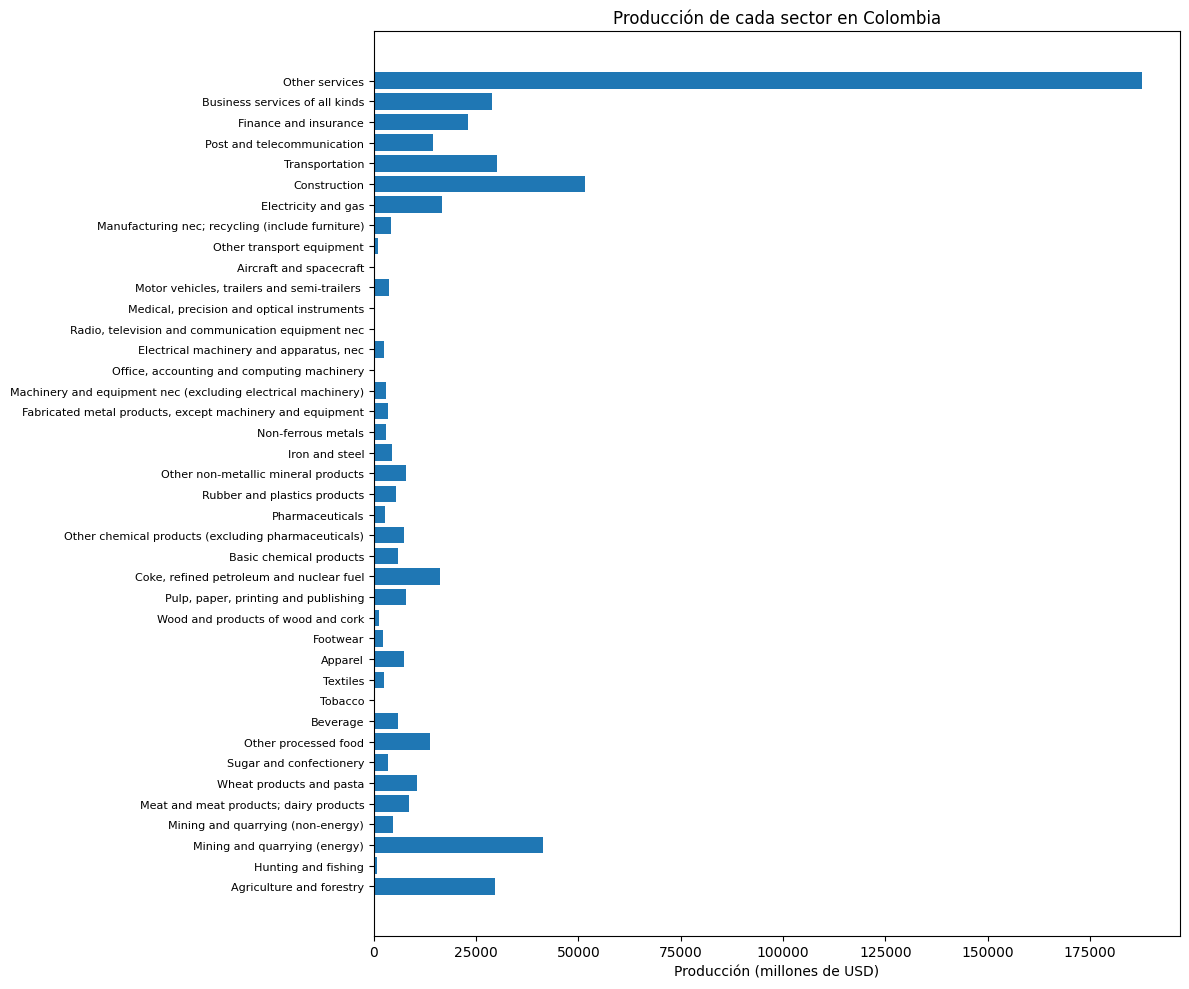

In [15]:
bol_intra_Z = BOL[bol_cols].to_numpy(na_value=0) #Matriz Z de Bolivia intra regional
bol_inter_Z = BOL[col_cols].to_numpy(na_value=0) #Matriz Z de Bolivia inter regional

col_intra_Z = COL[col_cols].to_numpy(na_value=0) #Matriz Z de Colombia intra regional
col_inter_Z = COL[bol_cols].to_numpy(na_value=0) #Matriz Z de Colombia inter regional

bol_vector_P_with_zeros = bol_p.to_numpy(na_value=1)
col_vector_P_with_zeros = col_p.to_numpy(na_value=1)

#Cambiamos los 0 por 1 para que no haya problemas con la descomposicion LU
bol_vector_P = [p if p != 0 else 1 for p in bol_vector_P_with_zeros] 
col_vector_P = [p if p != 0 else 1 for p in col_vector_P_with_zeros]

bol_matriz_P = np.diag(bol_vector_P) #Matriz P de Bolivia
col_matriz_P = np.diag(col_vector_P) #Matriz P de Colombia

print(f"Dimensiones de la matriz P de Bolivia: {bol_matriz_P.shape}")
print(f"Dimensiones de la matriz P de Colombia: {col_matriz_P.shape}")

# Grafico de produccion de cada sector en Bolivia
plt.figure(figsize=(12, 10))
plt.barh(range(len(sectores)), bol_vector_P)
plt.yticks(range(len(sectores)), sectores, fontsize=8)
plt.xlabel('Producción (millones de USD)')
plt.title('Producción de cada sector en Bolivia')
plt.tight_layout()
plt.show()

# Grafico de produccion de cada sector en Colombia
plt.figure(figsize=(12, 10))
plt.barh(range(len(sectores)), col_vector_P)
plt.yticks(range(len(sectores)), sectores, fontsize=8)
plt.xlabel('Producción (millones de USD)')
plt.title('Producción de cada sector en Colombia')
plt.tight_layout()
plt.show()

c) Matrices de coeficientes tecnicos de cada pais

In [22]:
bol_A_rr = calcular_coeficientes_tecnicos(bol_intra_Z, bol_matriz_P) #Matriz A de Bolivia intra regional
bol_A_rs = calcular_coeficientes_tecnicos(bol_inter_Z, col_matriz_P) #Matriz A de Bolivia inter regional

col_A_rr = calcular_coeficientes_tecnicos(col_intra_Z, col_matriz_P) #Matriz A de Colombia intra regional
col_A_rs = calcular_coeficientes_tecnicos(col_inter_Z, bol_matriz_P) #Matriz A de Colombia inter regional


Calculamos las demandas externas de cada pais

In [23]:
rows, cols = bol_A_rr.shape
#d = (I - A^rr)p - A^rs*p^s
bol_d_rs = (np.eye(rows,cols) - bol_A_rr) @ bol_vector_P - bol_A_rs @ col_vector_P

rows, cols = col_A_rr.shape
col_d_rs = (np.eye(rows,cols) - col_A_rr) @ col_vector_P - col_A_rs @ bol_vector_P

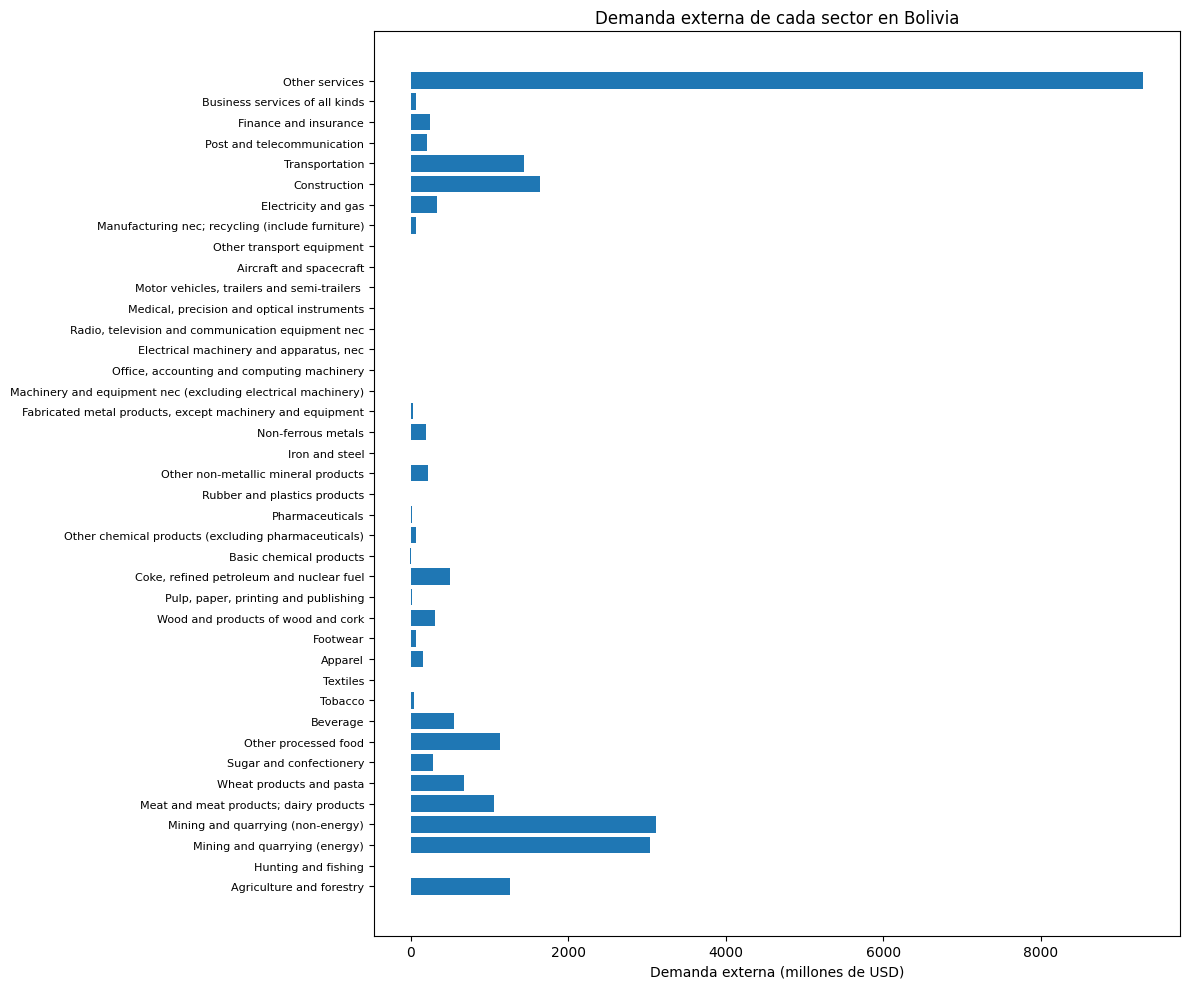

In [18]:
#Demanda Externa de Bolivia
plt.figure(figsize=(12, 10))
plt.barh(range(len(sectores)), bol_d_rs)
plt.yticks(range(len(sectores)), sectores, fontsize=8)
plt.xlabel('Demanda externa (millones de USD)')
plt.title('Demanda externa de cada sector en Bolivia')
plt.tight_layout()
plt.show()

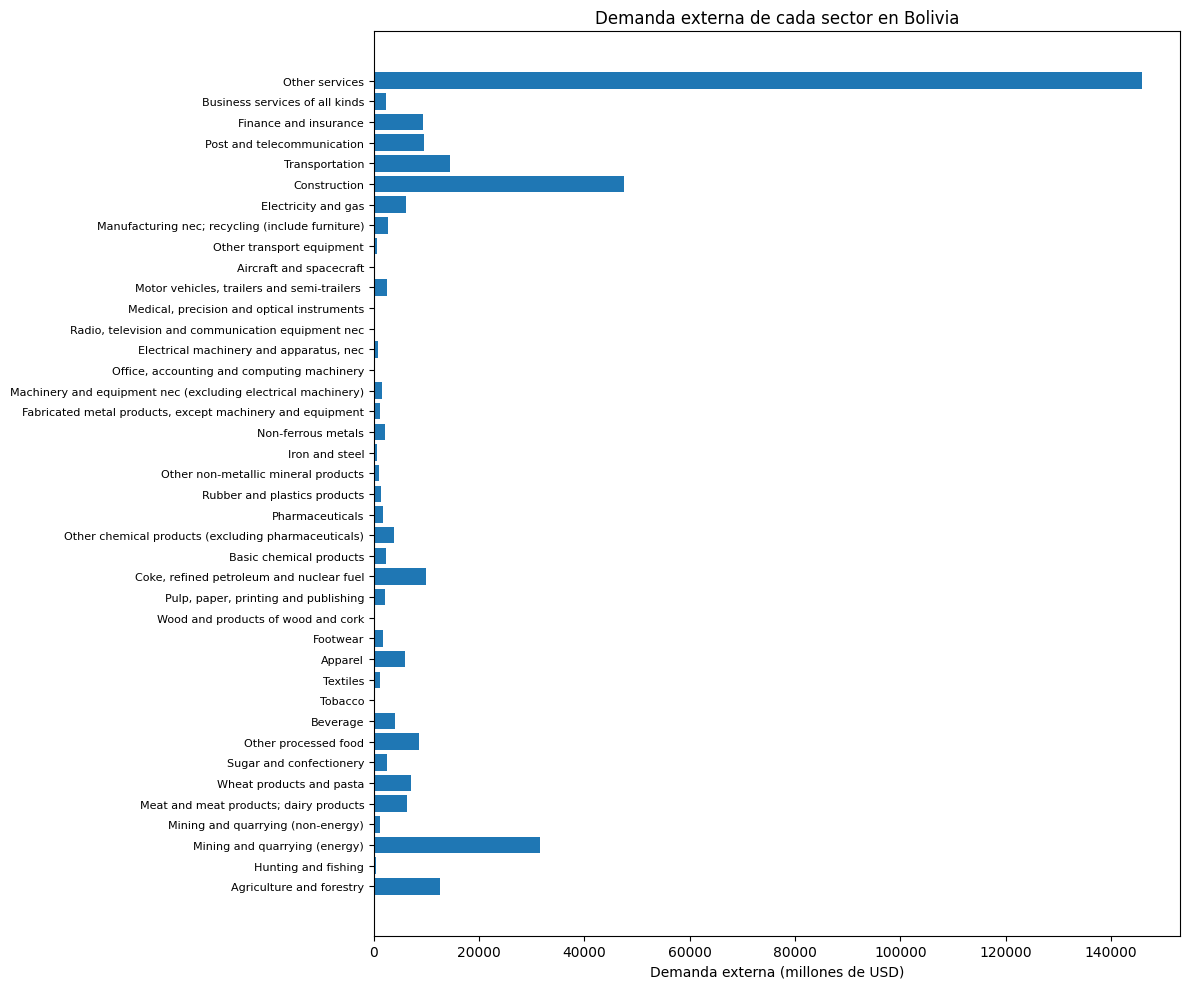

In [19]:
#Demanda Externa de Bolivia
plt.figure(figsize=(12, 10))
plt.barh(range(len(sectores)), col_d_rs)
plt.yticks(range(len(sectores)), sectores, fontsize=8)
plt.xlabel('Demanda externa (millones de USD)')
plt.title('Demanda externa de cada sector en Bolivia')
plt.tight_layout()
plt.show()

d)

In [24]:
bol_d_rs[4] = bol_d_rs[4] * 0.9
bol_d_rs[5:8] = bol_d_rs[5:8] * 1.033
delta_bol_d = bol_d_rs

Variacion de la produccion de cada sector en Bolivia:
[-1.12202723e+02 -3.38480041e-02 -7.65075490e+00 -7.67623725e+00
 -1.17127191e+02  2.67781529e+01  7.09437434e+00 -1.32772496e+02
 -4.49568288e+01  0.00000000e+00 -2.02109481e+00 -2.78980231e+01
 -1.57079978e+00 -4.00357878e-01 -9.57660091e-01 -2.11285690e+00
 -2.24466721e-01 -4.80523975e-01 -8.41249614e-01 -9.40846040e-01
 -3.95644230e+00 -6.73954171e-03 -6.72020453e+00 -2.27322175e-01
 -2.68399694e-01 -8.56361285e-03 -8.87169899e-02  0.00000000e+00
 -2.31823000e-04 -1.04197318e-01  0.00000000e+00  0.00000000e+00
 -2.87154505e-01 -3.47228250e+00 -9.43436795e-02 -2.52232084e+01
 -1.68401494e+00 -2.90661517e+00 -4.56657922e+00 -1.03696213e+01]


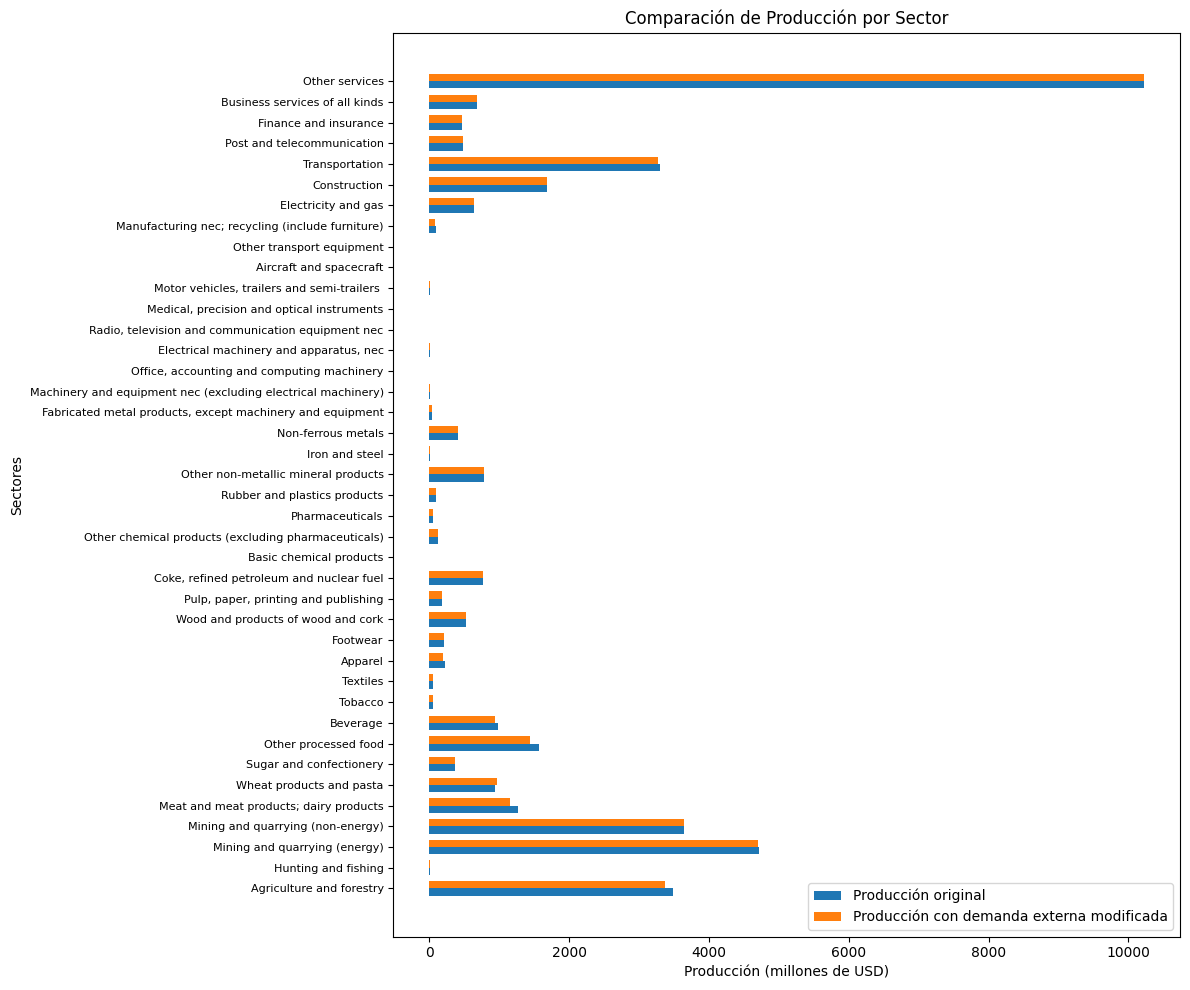

In [37]:
i_bol_A = np.eye(bol_A_rr.shape[0], bol_A_rr.shape[1]) - bol_A_rr
leontief_bol = inversaPLU(*calcularPLU(i_bol_A))
bol_p_prima = leontief_bol @ delta_bol_d
bol_delta_p = bol_p_prima - bol_vector_P
print(f"Variacion de la produccion de cada sector en Bolivia:\n{bol_delta_p}")


# Número de sectores
n_sectores = len(sectores)
indice = np.arange(n_sectores)
altura = 0.35  

# Grafico con la variacion de la produccion de cada sector en Bolivia
plt.figure(figsize=(12, 10))
plt.barh(indice - altura/2, bol_vector_P, height=altura, label='Producción original')
plt.barh(indice + altura/2, bol_p_prima, height=altura, label='Producción con demanda externa modificada')
plt.ylabel('Sectores')
plt.xlabel('Producción (millones de USD)')
plt.title('Comparación de Producción por Sector')
plt.yticks(range(len(sectores)), sectores, fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()